# 重要的分布

**Probability**: study the behaviour of random variable given the distribution and parameters

## 泊松分布（Poisson distribution）


服从泊松分布的例子：某段公路中，给定时间段（比如每周）内发生致命交通事故的数量。


$P(y) = \frac{e^{-\mu} \mu^y}{y!}$, where y=0, 1, 2, ...

$E(Y) = var(Y) = \mu$，这是泊松分布的一个重要特点

$\sigma(Y) = \sqrt{\mu}$

一旦参数$\mu$给出，我们就可以通过上述分布计算特定取值y的概率。比如，$\mu$ = 2时，y=1的概率可以通过下述命令求得：

In [1]:
dpois(x=1, lambda=2)

[1] 0.2706706

类似地，利用R的向量化计算功能，y=0, y=1, ..., y=10的概率可以通过如下命令求得：

In [20]:
round( dpois(x=0:10, lambda=2), 3)

[1] 0.135 0.271 0.271 0.180 0.090 0.036 0.012 0.003 0.001 0.000 0.000

集合cumsum函数来计算累积之和，则可以求出对应的累积概率：

In [3]:
cumsum(dpois(x=0:10, lambda=2))

[1] 0.1353353 0.4060058 0.6766764 0.8571235 0.9473470 0.9834364 0.9954662
 [8] 0.9989033 0.9997626 0.9999535 0.9999917

在泊松分布中，当参数$\mu$较小时，分布较为偏态；随着$\mu$增大，分布将越来越接近正态分布。

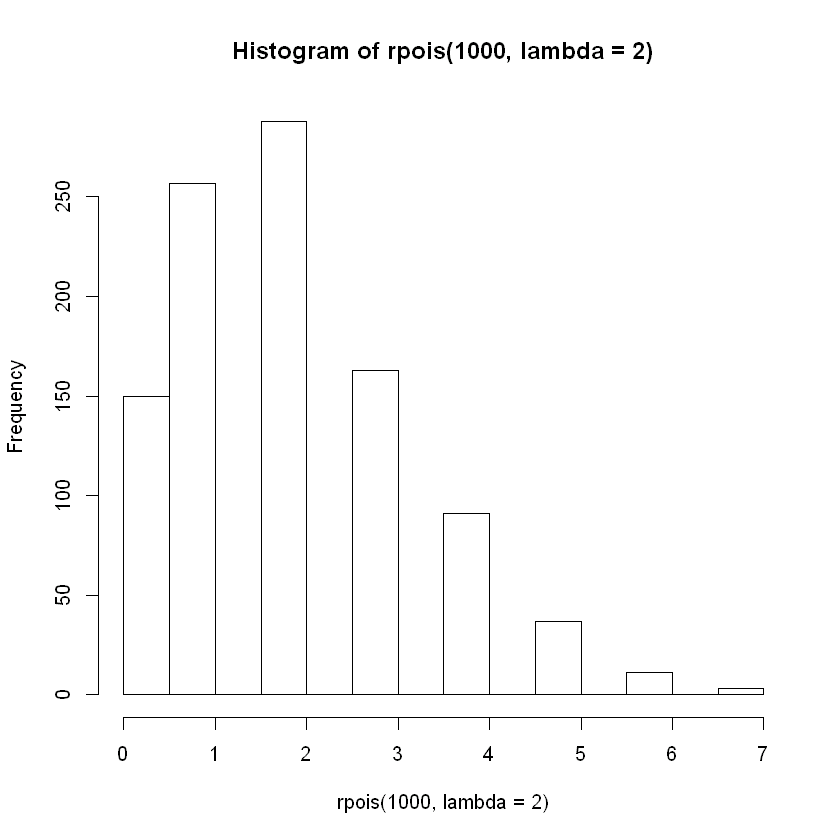

In [8]:
hist(rpois(1000, lambda=2))

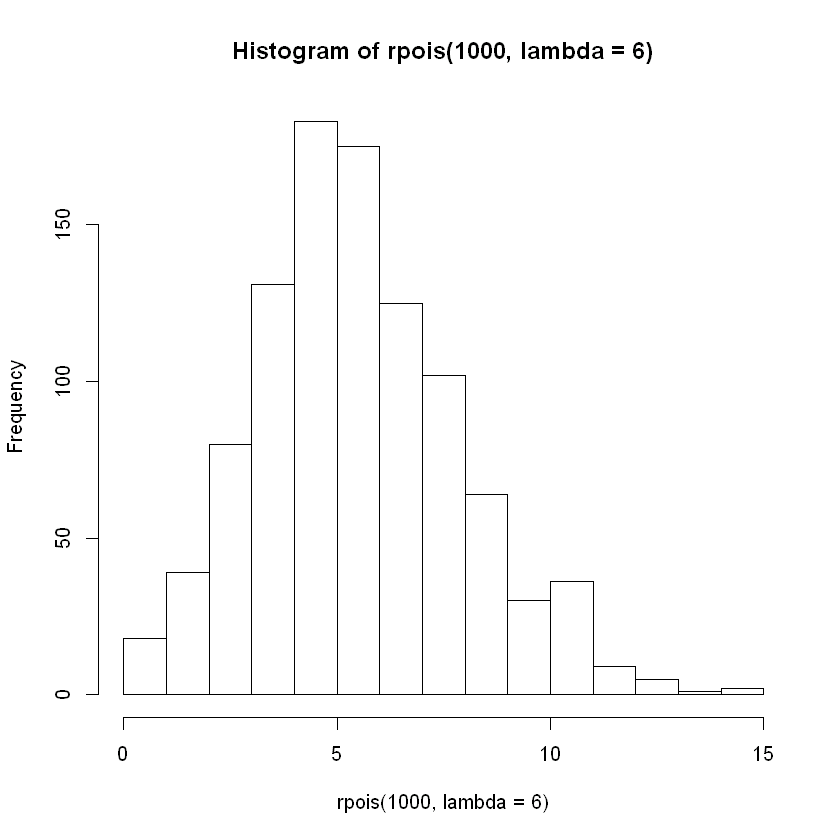

In [10]:
hist(rpois(1000, lambda=6))

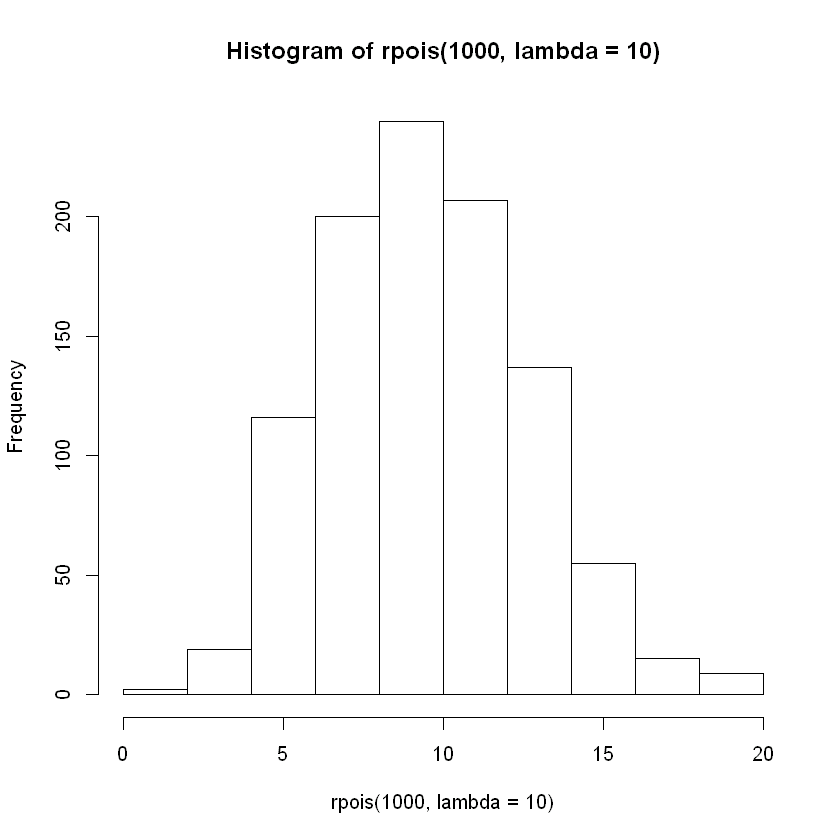

In [18]:
hist(rpois(1000, lambda=10))

## 二项分布（Binomial distribution）


实例：如果研究者试图估计所有交通事故中，致命交通事故所占的比例$\pi$，则研究者不再记录每周知名交通事故数量，而是记录N起交通事故，以及这N起事故中致命事故的数量。此时，致命交通事故不再服从泊松分布，而是二项分布，因为$N$在本研究设计中被看作固定值。

贝努利试验：N个**独立相同**的试验，每个试验只有成功与失败两种结果，成功的概率为$\pi$。

二项分布：在这N次试验中，成功的次数为Y，那么，Y服从以N和$\pi$为参数的二项分布。

$P(y) = \frac{N!}{y!(N-y)!}\pi^y (1-\pi)^{N-y}$, where y = 0, 1, 2, ..., N

$E(Y) = N\pi$

$Var(Y)=N\pi(1-\pi)$

假如N=10，$\pi = 0.2$，则y=0，y=1，...，y=10的概率可以通过如下命令求得：

In [21]:
round( dbinom(0:10, size=10, prob=0.2), 3)

[1] 0.107 0.268 0.302 0.201 0.088 0.026 0.006 0.001 0.000 0.000 0.000

通过rbinom命令可以生产1000个来自上述二项分布的随机数，进而通过table和plot函数呈现该二项分布的形状：

In [25]:
table(rbinom(20,10, 0.2))


0 1 2 3 
1 9 7 3 

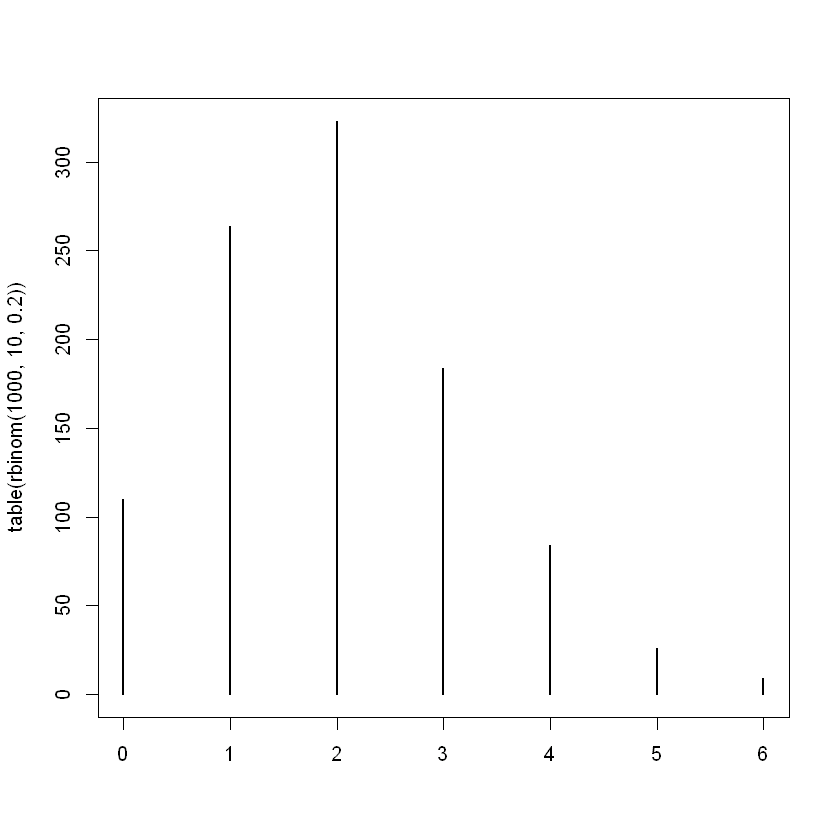

In [17]:
plot(table(rbinom(1000,10, 0.2)))

## 多项分布（multinomial）

每次试验能产生c种（而不再是2种）结果；当第i次试验的结果为j时，记为$y_{ij} =1$，否则$y_{ij} =0$；那$\mathbf{y_i} = (y_{i1},...,y_{ic})$ 表示一次多项试验结果，则$\sum{y_i} = 1$。

如果在n次独立而相同的实验中，让$n_j = \sum_i{y_{ij}}$表示结果为j的试验的次数，则$（n_1, n_2, ..., n_j）$服从多项分布。

$p({n_1, n_2, ..., n_j}) = (\frac{n!}{n_1! n_2!...n_c!})\pi_1^{n_1}\pi_2^{n_2}...\pi_c^{n_c}$

由于$\sum{n_i}=1$,上述分布是c-1维度的。对多项分布而言，

$E(n_j) = n\pi_j$

$var(n_j) = n\pi_j(1-\pi_j)$

$cov(n_j, n_k) = -n\pi_j \pi_k$

**多项分布与泊松分布的联系**：对$j$个泊松分布$(Y_i, Y_2, Y_3, ..., Y_j)$，它们之和$n=\sum{Y_i}$，对应参数$\mu = \sum{\mu_i}$。当泊松抽样中将n设为固定值而不是随机值，即以$\sum{Y_i}=n$为条件时，${Y_i}$不再是泊松分布，而是多项分布。详见Agrestic (2013: 7-8)。

相关的R命令包括 rmultinom 和 dmultinom 。

## 卡方分布

让$Z$为标准的正态分布，那么$Z^2$服从自由度为1的卡方分布。 如果有v个标准的正态分布，$Z_1^2 + Z_2^2 + ... + Z_v^2$ 则服从自由度为v的卡方分布。

对于自由度为df的卡方分布，均值等于df，方差为$2df$，偏度为$\sqrt{\frac{8}{df}}$。

In [3]:
pchisq(q = 4, df = 1)

[1] 0.9544997

In [4]:
pchisq(1.96^2, df=1, lower.tail= FALSE)

[1] 0.04999579

# 最大似然估计(MLE)

**Statistics**: estimate the parameter values given the data at hand

**Likelihood function**: the probability of the obseved data expressed as a function of the parameter

**ML estimator**

1. the parameter values for which the probability of the observed data takes its maximum value

2. before observing the data, it is unknown, but has a some sampling distribution

**Estimate**: the value of an estimator for an obseved data set

_Demonstrate MLE_

假如有一个样本量为100的样本，其中52个为男性，参数为男性比例$\pi$。如果以$x$表示$\pi$，则对应的似然函数为$L(x) = \frac{100!}{52!(100-52)!} x^{52}(1-x)^{(100-52)}$。

该似然函数形状如下（值得一提的是，似然函数的第一部分可以直接调用choose函数计算）：

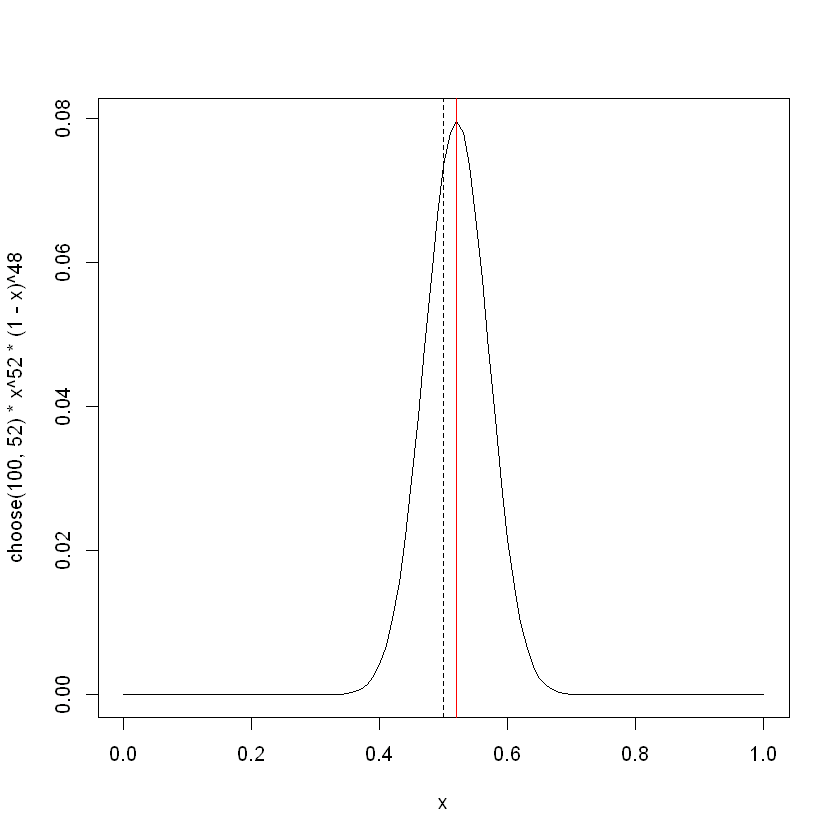

In [1]:
# curve(factorial(100)/(factorial(52)*factorial(48))*x^52*(1-x)^48, 0,1)
curve(choose(100, 52)*x^52*(1-x)^48, 0,1)
abline(v=0.52, col="red")
abline(v=0.5, lty=2)

对数似然函数的形状可以反映出关于参数的信息量的多寡（Fox, 2009）。比如，

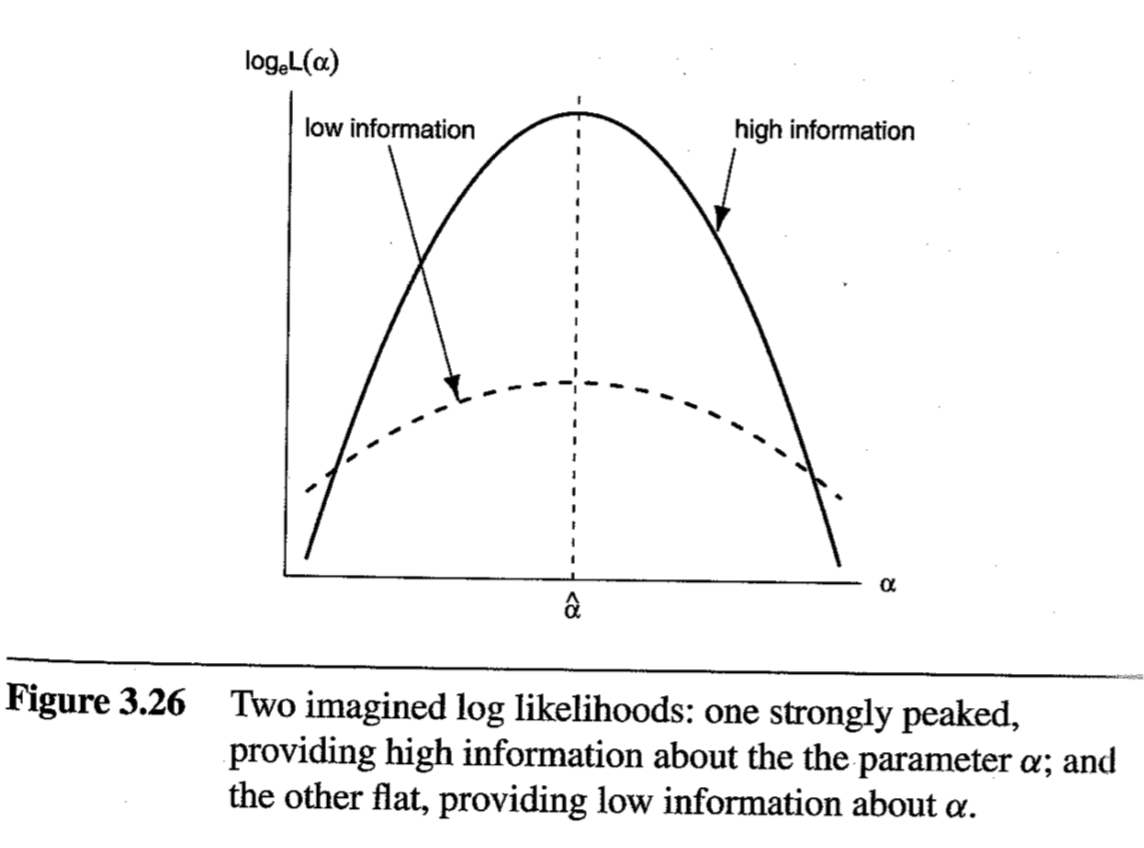

In [6]:
library("IRdisplay")
display_png(file="Figures/Fox.Figure3.26.png")  

### Wald检验与似然比检验的基本原理

在上面例子中，当$\hat{x}=0.52$时，似然函数能够取得最大值。假如需要检验 $H_0: \pi = 0.5$,则需要比较估计值$\hat{x}$与零假设的差异有多大，如果差异比较小，则可以认为所观察到的差异由随机性所导致，否则需要拒绝原假设。比较的方式有两种：
* 比较0.52与0.5的差异，同时考虑估计量$\hat{x}$的标准差。这种检验的方式是Wald检验。
* 比较0.52对应的似然值与0.5对应似然值的差异，同时考虑似然函数曲率。这种检验的方式是似然比检验。

对于这两种统计检验的解释，Fox (2009:137)给出了图形化的解释：

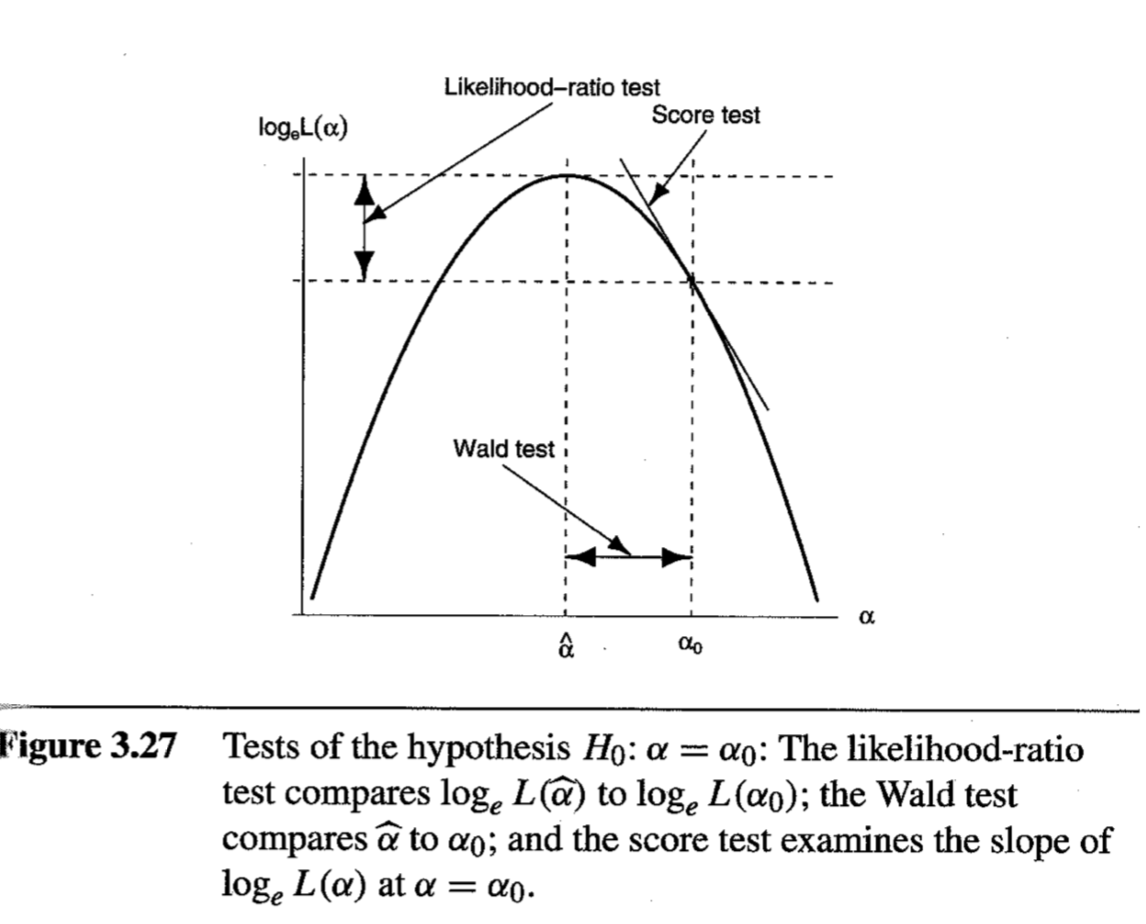

In [7]:
display_png(file="Figures/Fox.Figure3.27.png")  

# 对比例的统计推断

Test about a proportion
------------------------
The sampling distribution of proportion $\pi$

$E(p)=\pi$

ML estimator $p$ for the binomial parameter $\pi$

$\sigma (p) = \sqrt{\frac{\pi(1-\pi)}{N}}$

当N增加时，标准误将逐步减小。

Approximate normality of the distribution of _p_, for large N. Test H0: $\pi = \pi_0$, the test statistic is

$z=\frac{p-\pi_0}{\sqrt{\frac{\pi_0 (1-\pi_0)}{N}}}$

Confidence interval for a proportion
------------------------------------
large-sample 95% confidence interval for $\pi$

$[(p-1.96 \hat\sigma(p)), (p+1.96 \hat\sigma(p))]$ , where $\hat\sigma(p)=\sqrt{p(1-p)/N}$

When $\pi <0.2$ or $\pi >0.8$, it does not work well, even for moderately large sample size.

**actual coverage probability** versus **nomial coverage probability** which is set at 0.95

_demonstrate the actual coverage probability_

Alternative solution: find all null values that have test statistics $|z|$ less than 1.96 (only the two limits are needed). 

**Rough Guideline**: large sample test and the associted confidence interval perform well when $N\pi>5$ and $N(1-\pi)>5$.

# 参考文献

Agresti, An introduction to categorical data analysis, chapter 1.


# 二维列联表

## Joint, marginal, and conditional probabilities

1.let $\pi_{ij} = P(X=i, Y=j)$, then $\pi_{ij}$ is joint distribution of X and Y, and $\sum{\pi_{ij}}=1$

2.Marginal distributions are row or colum totals of joint probabilities, denoted by $\pi_{i+}$ and $\pi_{+j}$.

3.Conditional probabilities are probabilities of Y at a given level of X. They form the conditional distribution.

4.X and Y is statistically independent if $\pi_{ij} = \pi_{i+} \pi_{+j}$ for i=1,2,...,I and j=1,2,...,J.


## Two-by-two tables

Frequency table

$n_{11}$ | $n_{12}$
-------- | ---------
$n_{21}$ | $n_{22}$

**Difference of proportions:**
Define sample proportion as $p_1 = n_{11} / n_{1+}$ and $p_2 = n_{21} / n_{2+}$, then difference of proportions is
$p_1 - p_2$, with the estimated standard error of

$\hat \sigma (p_1 - p_2) = \sqrt{\frac{p_1 (1- p_1 )}{N_1} + \frac{p_2(1-p_2)}{N_2}}$

**Odds ratio（重要概念）:**

Odds of success for row 1 is defined as:
$odds_1=\frac{\pi_1}{1-\pi_1}$, where $\pi_1$ is the probability of sucess in row 1.

Odds of success for row 2 is defined as:
$odds_2=\frac{\pi_2}{1-\pi_2}$, where $\pi_2$ is the probability of sucess in row 2.

We can calc success probability from the odds.

Odds ratio is the ratio of two odds:

$\theta=\frac{odds_1}{odds_2}$

Properties of odds ratio:

1. equal any nonnegative number

2. values of $\theta$ far from 1 indicate strong levels of association (1 indicates independence)

3. It does not change even the orientation of the table is reverse (treats variables symmetrically)

4. can be defined using joint probabilities as $\theta = \frac{\pi_{11}/\pi_{12}} {\pi_{21}/\pi{22}}$

5. Sample odds ratio is $\hat \theta = \frac{n_{11} n_{22}} {n_{12} n_{21}}$

*Note*: 1) odds ratior is not relative risk, which is $\frac{\pi_1}{\pi_2}$; 2) if differentiate response variable, put it as column in accordance with convention

**Inference for odds ratio and log odds ratio**

* Prefer to work on log odds ratio because odds ratio is skewed.

* Once we have the interval of log odds ratio, we can get interval of odds ratio by expoentiating the endpoits.

## 卡方检验
---------------------------------
零假设$H_0$：两个类别变量彼此独立。该原假设也可以表述为：$H_0: \pi_{ij} = \pi_{i+} \pi_{+j}$

Expected frequency $\mu_{ij}$: values of the expectations $E(n_{ij})$ when $H_0$ holds true.

### Pearson chi-sqaured statistic

$X^2 = \sum{\frac{(n_{ij} -\mu_{ij})^2}{\mu_{ij}}}$

1. 该统计量服从卡方分布。
2. Greater values suggest stronger evidence against H0.
3. Chi-squared distribution is specified by degree of freedom (df). Become bell shape as df increases.
4. DF is the difference between the number of parameters under H1 and H0, which is df = (nrow-1)(ncol-1)

**卡方分布**：假如有n个独立的随机变量，每个变量服从标准正态分布，它们的平方和则构成一个新的随机变量，则新的随机变量服从自由度为n的卡方分布。卡方分布的形状由自由度决定。卡方分布的形状如下：

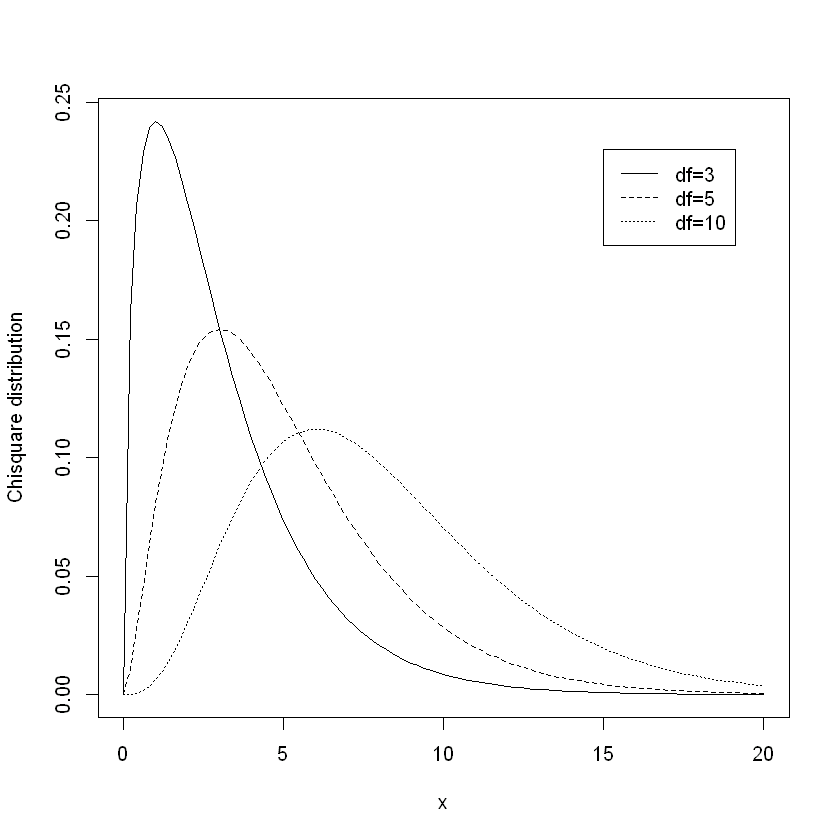

In [7]:
curve(dchisq(x,df=3), from=0, to=20, lty=1, ylab="Chisquare distribution")
curve(dchisq(x,df=5), from=0, to=20, lty=2, add=TRUE)
curve(dchisq(x,df=8), from=0, to=20, lty=3, add=TRUE)
legend(15, 0.23, legend=c("df=3", "df=5", "df=10"), lty=1:3)

_Pearson residuals_ have the form of $\frac{n_{ij} - \hat\mu_{ij}}{\sqrt{\hat\mu_{ij}}}$

_Adjusted residuals or standardised pearson residuals_ have the form of
$\frac{n_{ij} - \hat\mu_{ij}}{\sqrt{\hat\mu_{ij} (1-p_{i+})(1-p_{+j})}}$

### Likelihood-ratio statistic

it is based on the following ratio:

$\lambda = \frac{maximum likelihood when parameters satisfy H0}{maximum likelihood when parameters are not restricted}$

1. it cannot exceed 1.

2. if far below 1, evidence against H0.

_Likilihood ratio chi-squared statistic_ is defined as $-2log(\lambda)$.

For two-way tables, it simplifies to $G^2 = 2\sum{n_{ij}log(\frac{n_{ij}}{\mu_{ij}}) }$

Its minimum value is 0, larger values provide stronger evidence against H0.

### Partition of chi-sqaured

1. If two chi-sqaured statistics of degree of freedom $df1$ and $df2$, then the sum of the two statistics is chi-squared of $df = df1+df2$.

2. A partitioning may show an association primarily reflects differences between certain categories.

### Comments on chi-squared tests

1. Only show degree of evidence for an association.

2. Needs large sample size, at the very least $\frac{n}{IJ} >= 5$, where $I$ is the number of row and $J$ is the number of column.

3. Neglect the order of variable values (treats as nomial variables).


# 参考文献

Agresti, An introduction to categorical data analysis, chapter 2.

# 与二维列联表分析相关的R命令

## 建构列链表
* 如果是原始数据，则可以通过table函数建构列链表
* 考虑到table函数仅输出频数，可以通过descr程序包中的CrossTable函数建构列链表

In [2]:
data(TitanicSurvival, package="effects")
head(TitanicSurvival)

,survived,sex,age,passengerClass
"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
"Allison, Miss. Helen Loraine",no,female,2.0000,1st
"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st
"Anderson, Mr. Harry",yes,male,48.0000,1st


In [3]:
table(TitanicSurvival$passengerClass, TitanicSurvival$survived)

     
       no yes
  1st 123 200
  2nd 158 119
  3rd 528 181

In [3]:
library(descr)
CrossTable(TitanicSurvival$passengerClass, TitanicSurvival$survived)

   Cell Contents 
|-------------------------|
|                       N | 
| Chi-square contribution | 
|           N / Row Total | 
|           N / Col Total | 
|         N / Table Total | 
|-------------------------|

                                  TitanicSurvival$survived
TitanicSurvival$passengerClass        no      yes   Total
---------------------------------------------------------
1st                                  123      200     323
                                  29.411   47.587        
                                   0.381    0.619   0.247
                                   0.152    0.400        
                                   0.094    0.153        
---------------------------------------------------------
2nd                                  158      119     277
                                   1.017    1.645        
                                   0.570    0.430   0.212
                                   0.195    0.238        
                         

* 如果已经具有列链表，则可以手工输入数据，并通过as.table命令建构列链表。

In [5]:
## use association plot to show pearson residuals
## From Agresti(2007) p.39
M <- as.table(rbind(c(762, 327, 468), c(484, 239, 477)))
dimnames(M) <- list(Gender = c("M","F"), Party = c("Democrat","Independent", "Republican"))
print(M)

      Party
Gender Democrat Independent Republican
     M      762         327        468
     F      484         239        477


## 卡方检验
* 将CrossTable函数的chisq参数设置为TRUE即可给出卡方检验结果
* 直接调用chisq.test命令进行卡方检验，该命令的输入参数是一个table对象

In [18]:
CrossTable(TitanicSurvival$survived, TitanicSurvival$passengerClass, chisq=TRUE)

   Cell Contents 
|-------------------------|
|                       N | 
| Chi-square contribution | 
|           N / Row Total | 
|           N / Col Total | 
|         N / Table Total | 
|-------------------------|

                            TitanicSurvival$passengerClass
TitanicSurvival$survived       1st     2nd      3rd   Total
-----------------------------------------------------------
no                             123     158      528     809
                            29.411   1.017   18.411        
                             0.152   0.195    0.653   0.618
                             0.381   0.570    0.745        
                             0.094   0.121    0.403        
-----------------------------------------------------------
yes                            200     119      181     500
                            47.587   1.645   29.788        
                             0.400   0.238    0.362   0.382
                             0.619   0.430    0.255        
 

In [19]:
(Xsq <- chisq.test(M))  # Prints test summary


	Pearson's Chi-squared test

data:  M
X-squared = 30.07, df = 2, p-value = 2.954e-07


## 二维列链表的可视化

**vcd**程序包提供了众多可视化工具来帮助我们对分类数据进行探索性分析。

### 2x2列链表的可视化
可以通过fourfold函数进行可视化：
* it is used to depict odds ratio
* it is only for 2x2 tables

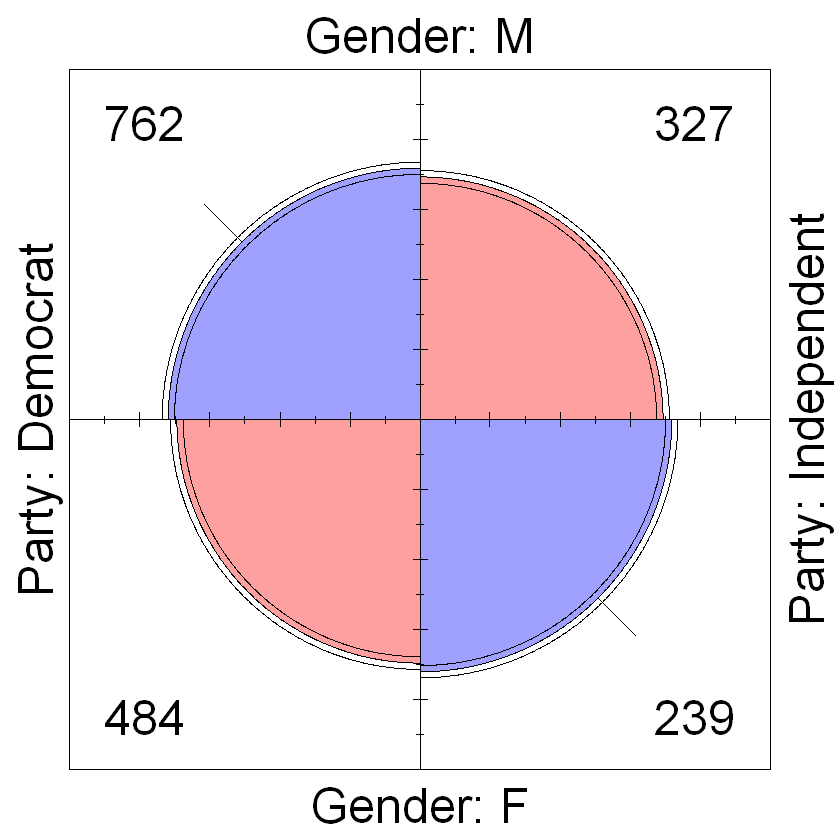

In [20]:
library(vcd)
fourfold( M[,1:2] ) 

* 每个象限的圆形半径与$\sqrt{频数}$成比例。

* 上述图形中，相邻两个象限的odds ratio的置信区间重合，表明零假设（H0:odds ratio不存在显著差异）与数据相一致。

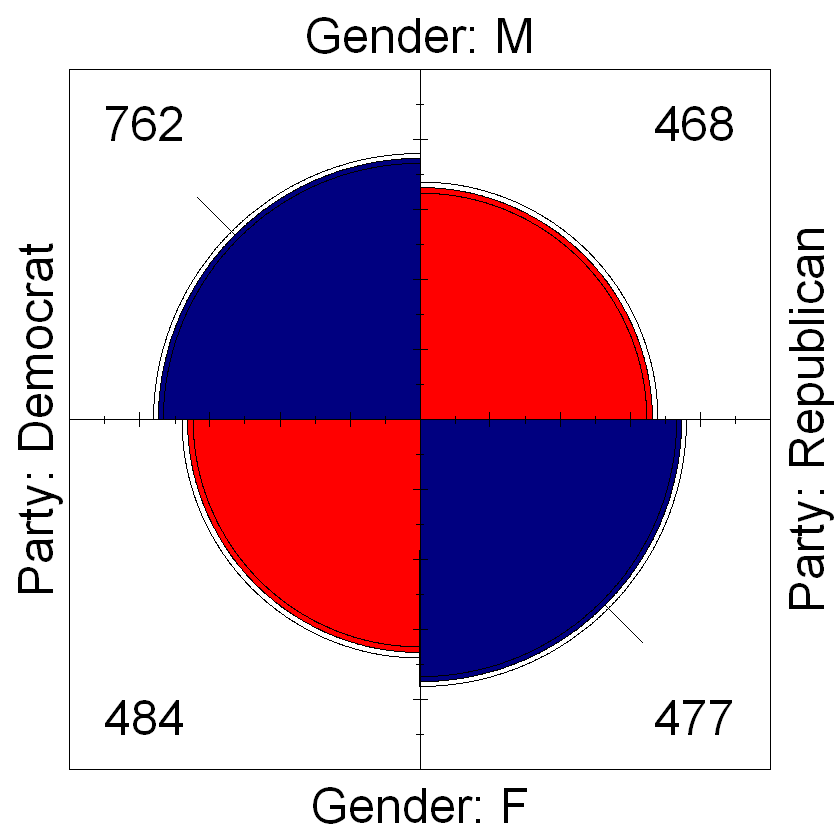

In [21]:
fourfold( M[,c(1,3)] ) 

上述图形中，相邻两个象限的odds ratio的置信区间并没有重合，这表明零假设（H0:odds ratio不存在显著差异）并不成立。

### 对期望频数/皮尔孙残差进行可视化


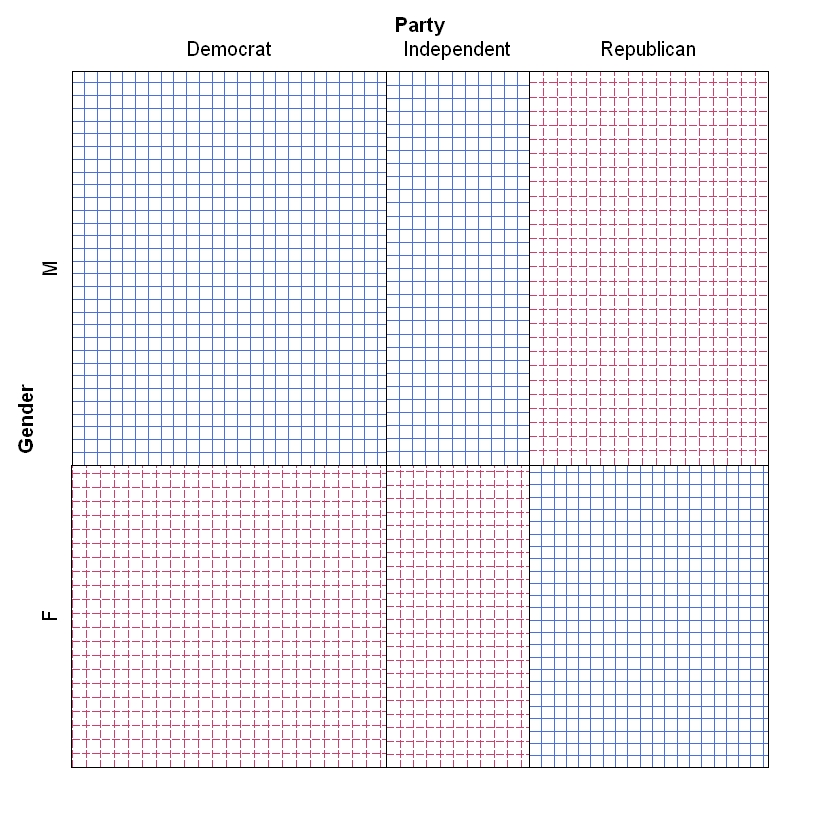

In [22]:
sieve(M,sievetype="observed", shade=TRUE)

在上图中，实线方格子否面积反映了期望频数，方框内虚线小格子数表示期望（sievetype="expected"）或者观察案例数（sievetype="observed"）。

如果小方格表示观察案例数时，蓝色表示残差大于零；小格子大小/稀密反映了期望残差大小，越密集则表示残差越大，红色表示残差小于零。

如果小格子表示期望频数，则均为红色。

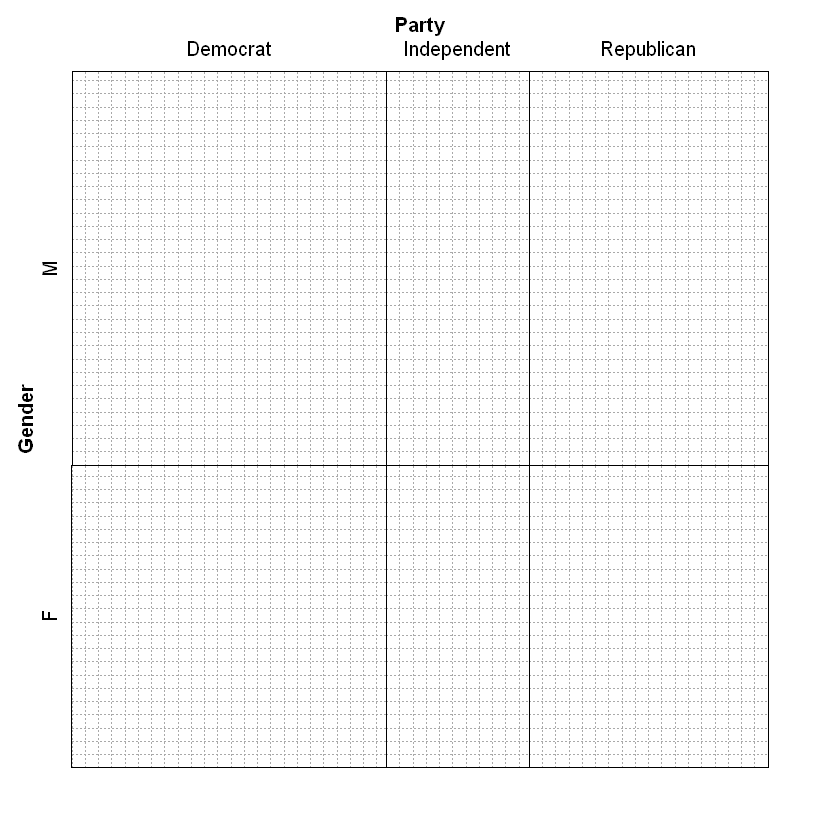

In [23]:
sieve(M,sievetype="expected", shade=TRUE)

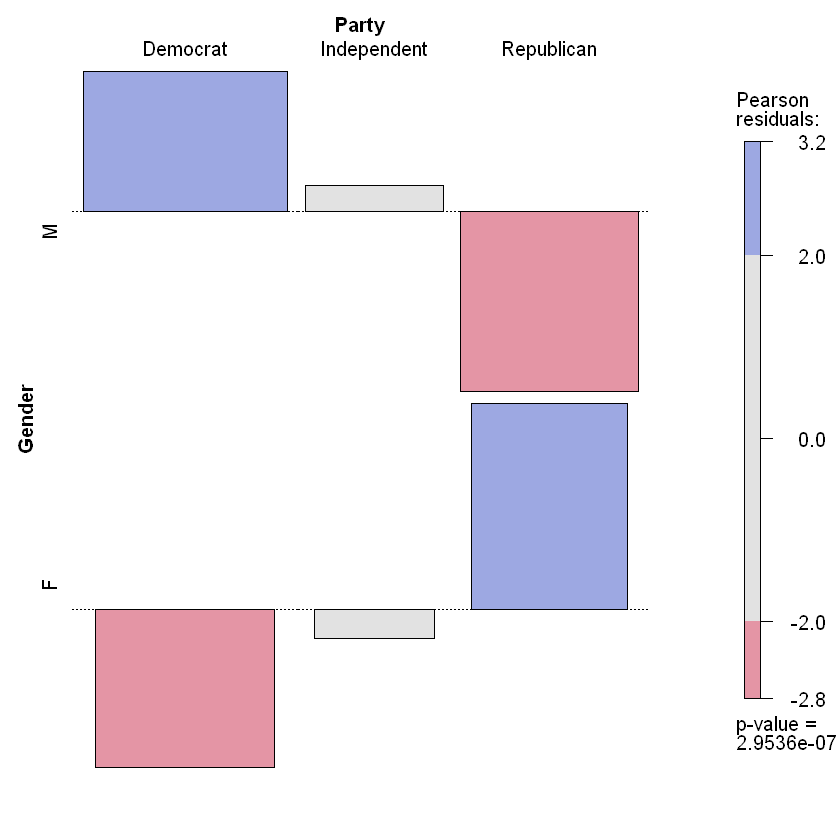

In [25]:
assoc(M, shade=TRUE) ## show pearson residuals

### 类别数据可视化的参考文献
Friendly, M. (2000), _Visualizing Categorical Data_.  SAS Institute, Cary, NC.
